In [1]:
!pip install --quiet icecream

In [2]:
import os
import sys

from icecream import ic
import glob
import matplotlib.pyplot as plt

import numpy as np
from scipy import ndimage
from skimage import color


In [3]:
if not os.path.isdir('/content/RAFT'):
  !git clone https://github.com/princeton-vl/RAFT.git
 
sys.path.insert(1,'/content/RAFT/core/')

from utils.frame_utils import readFlow as read_flow
from utils import flow_viz

# if not os.path.isdir('/content/models'):
#   !./RAFT/download_models.sh

Cloning into 'RAFT'...
remote: Enumerating objects: 133, done.
remote: Total 133 (delta 0), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (133/133), 10.01 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [4]:
if not os.path.isfile('/content/sample_frames_with_flos.zip'):
    !wget --quiet https://www.dropbox.com/s/jgzvkx9945upw06/sample_frames_with_flos.zip
    !unzip '/content/sample_frames_with_flos.zip'

Archive:  /content/sample_frames_with_flos.zip
   creating: sample_frames_with_flos/
  inflating: sample_frames_with_flos/frame_0017.png  
  inflating: sample_frames_with_flos/frame_0016.png  
  inflating: sample_frames_with_flos/frame0017.flo  
  inflating: sample_frames_with_flos/frame0020.flo  
  inflating: sample_frames_with_flos/frame0021.flo  
  inflating: sample_frames_with_flos/frame0023.flo  
  inflating: sample_frames_with_flos/frame0022.flo  
  inflating: sample_frames_with_flos/frame0019.flo  
  inflating: sample_frames_with_flos/frame0025.flo  
  inflating: sample_frames_with_flos/frame0024.flo  
  inflating: sample_frames_with_flos/frame0018.flo  
  inflating: sample_frames_with_flos/frame_0021.png  
  inflating: sample_frames_with_flos/frame_0020.png  
  inflating: sample_frames_with_flos/frame_0022.png  
  inflating: sample_frames_with_flos/frame_0023.png  
  inflating: sample_frames_with_flos/frame_0024.png  
  inflating: sample_frames_with_flos/frame_0018.png  
  infl

ic| len(flo_files): 9
ic| flos[0].shape: (218, 512, 2)
ic| 'imshow(flo_0[:,:,0] / 255.0)'


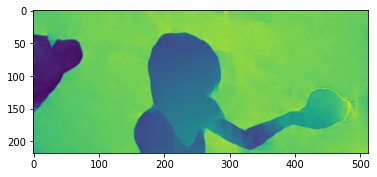

ic| 'imshow(flo_0[:,:,1] / 255.0)'


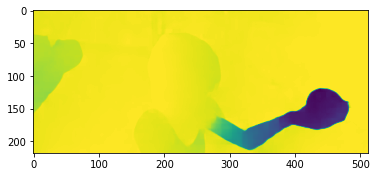

ic| 'imshow(flo_0[:,:,2] / 255.0)'


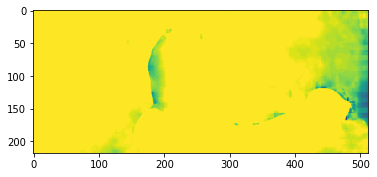

ic| 'imshow(flo_0 / 255.0)'


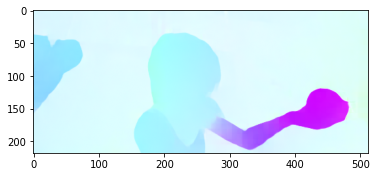

In [5]:
flo_files = glob.glob(os.path.join('sample_frames_with_flos/', '*.flo'))
flo_files = sorted(flo_files)
ic(len(flo_files))

flos = []
for flo_file in flo_files:
    flo = read_flow(flo_file)
    # flo = torch.from_numpy(flo)
    # flo = flow.permute(1,2,0).cpu().numpy()
    flos.append(flo)


ic(flos[0].shape)

flo_0 = flow_viz.flow_to_image(flos[0])

# pixel values are [0, 255], normalize by dividing by 255

plt.imshow(flo_0[:,:,0] / 255.0)
ic("imshow(flo_0[:,:,0] / 255.0)")
plt.show()

plt.imshow(flo_0[:,:,1] / 255.0)
ic("imshow(flo_0[:,:,1] / 255.0)")
plt.show()

plt.imshow(flo_0[:,:,2] / 255.0)
ic("imshow(flo_0[:,:,2] / 255.0)")
plt.show()

plt.imshow(flo_0 / 255.0)
ic("imshow(flo_0 / 255.0)")
plt.show()

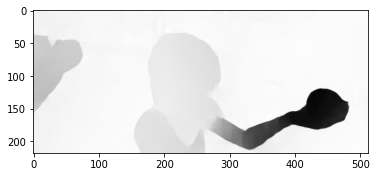

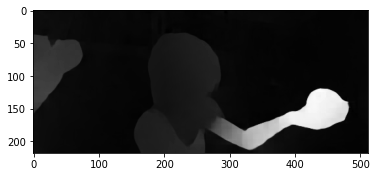

ic| ndimage.measurements.center_of_mass(gray_flo): (132.8284416210314, 289.80925061249724)
ic| np.ptp(gray_flo): 0.7409505882352941
ic| gray_flo.shape: (218, 512)


(218, 512)

In [6]:
gray_flo = color.rgb2gray(flo_0)
plt.imshow(gray_flo, cmap='gray')
plt.show()

# Invert the intensity so that "active" spots have higher numerical value in range [0, 1]
gray_flo_inverted = gray_flo.copy()
gray_flo = (gray_flo - 1 ) * -1
plt.imshow(gray_flo, cmap='gray')
plt.show()

ic(ndimage.measurements.center_of_mass(gray_flo))
ic(np.ptp(gray_flo))
ic(gray_flo.shape)

ic| np.max(gray_flo_exp): 1.0
ic| np.min(gray_flo_exp): 0.020209033937549047
ic| np.max(gray_flo_exp): 1.0
ic| np.min(gray_flo_exp): 0.0004084050526890091


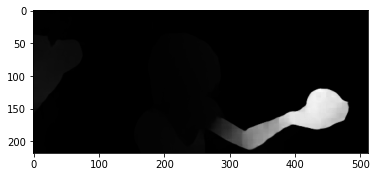

In [7]:
gray_flo_exp = gray_flo.copy()
gray_flo_exp = gray_flo_exp / np.max(gray_flo_exp)
ic(np.max(gray_flo_exp))
ic(np.min(gray_flo_exp))
gray_flo_exp = gray_flo_exp ** 2
ic(np.max(gray_flo_exp))
ic(np.min(gray_flo_exp))
plt.imshow(gray_flo_exp, cmap='gray')
plt.show()

In [8]:
# Return a circular mask of (True/False) 2d array
def create_circular_mask(shape, x, y, r):
    h, w = shape

    Y, X = np.ogrid[:h, :w]
    dist_from_center_mat = np.sqrt((X - x)**2 + (Y - y)**2)

    mask = dist_from_center_mat <= r
    return mask

def get_masked_img(img, x, y, r):
  mask = create_circular_mask(img.shape, x, y, r)
  masked = img.copy()
  masked[~mask] = 0
  return masked

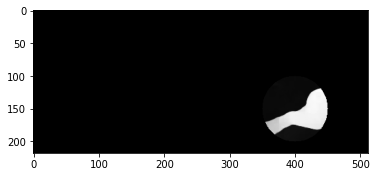

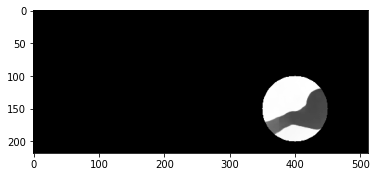

In [9]:
masked_gray_flo = get_masked_img(gray_flo, x=400, y=150, r=50)
masked_gray_flo_inverted = get_masked_img(gray_flo_inverted, x=400, y=150, r=50)

plt.imshow(masked_gray_flo, cmap='gray')
plt.show()
plt.imshow(masked_gray_flo_inverted, cmap='gray')
plt.show()

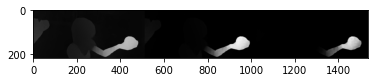

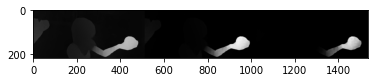

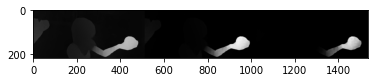

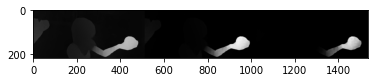

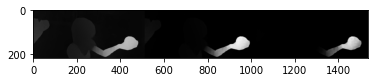

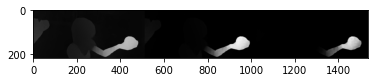

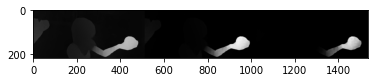

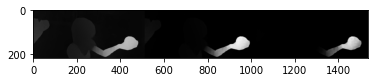

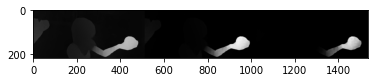

In [10]:
flo_imgs = [flow_viz.flow_to_image(flo) for flo in flos]
gray_flo_imgs = [color.rgb2gray(flo_0) for flo_img in flo_imgs]


# Invert the intensity so that "active" spots have higher numerical value in range [0, 1]
gray_flo_imgs = [(g - 1 ) * -1 for g in gray_flo_imgs]

gray_flow_exp_imgs = gray_flo_imgs.copy()
gray_flow_exp_imgs = [g / np.max(g) for g in gray_flow_exp_imgs]
gray_flow_exp_imgs = [g ** 2 for g in gray_flow_exp_imgs]
gray_flow_exp4_imgs = [g ** 2 for g in gray_flow_exp_imgs]

for im, exp_im, exp4_im in zip(gray_flo_imgs, gray_flow_exp_imgs, gray_flow_exp4_imgs):
    # plt.imshow(flo_im, cmap='gray')
    # plt.show()
    plt.imshow(np.concatenate((im, exp_im, exp4_im), axis=1), cmap='gray')
    plt.show()

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


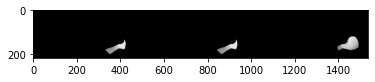

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


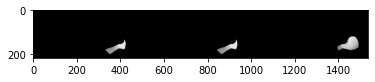

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


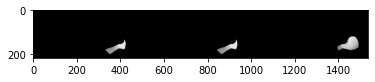

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


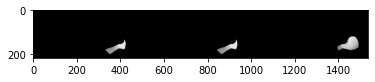

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


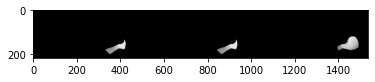

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


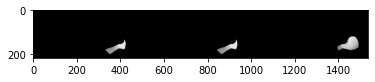

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


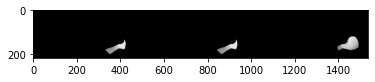

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


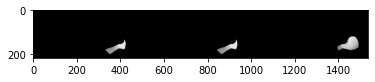

ic| ndimage.measurements.center_of_mass(im): (132.8284416210314, 289.80925061249724)
ic| ndimage.measurements.center_of_mass(exp_im): (154.46780679204664, 374.29894781505584)
ic| ndimage.measurements.center_of_mass(exp4_im): (157.82469599495568, 418.72252815420757)


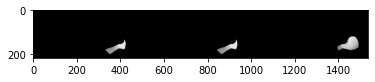

ic| candidate_xy_list: [(157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757),
                        (157.82469599495568, 418.72252815420757)]


[(157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757),
 (157.82469599495568, 418.72252815420757)]

In [11]:
# Plot the center-of-mass for each image:
# 1. grayscale of the optical flow
# 2. normalized then exponentiated (**2) version of 1
# 3. exponentiated version of 2 (so now **4)

# The exponentiation helps to bias the center-of-mass calculation.

# This is a naive way to compute (x,y) but we need a way to compute radius, still.
candidate_xy_list = []
for im, exp_im, exp4_im in zip(gray_flo_imgs, gray_flow_exp_imgs, gray_flow_exp4_imgs):
    (com_h, com_w) = ic(ndimage.measurements.center_of_mass(im))
    (com_exp_h, com_exp_w) = ic(ndimage.measurements.center_of_mass(exp_im))
    (com_exp4_h, com_exp4_w) = ic(ndimage.measurements.center_of_mass(exp4_im))
    candidate_xy_list.append((com_exp4_h, com_exp4_w))
    masked_im_com = get_masked_img(im, com_w, com_h, r=50)
    masked_exp_im = get_masked_img(exp_im, com_exp_w, com_exp_h, r=50)
    masked_exp4_im = get_masked_img(exp4_im, com_exp4_w, com_exp4_h, r=50)
    plt.imshow(np.concatenate((masked_exp_im, masked_exp_im, masked_exp4_im), axis=1), cmap='gray')
    # plt.imshow(masked_exp4_im, cmap='gray')
    plt.show()

ic(candidate_xy_list)

ic| 'visualized flow file'


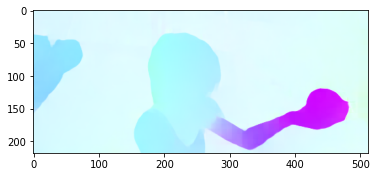

ic| 'grayscale flow'


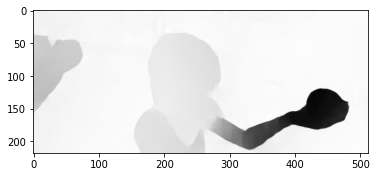

ic| 'grayscale flow (inverted high=1)'


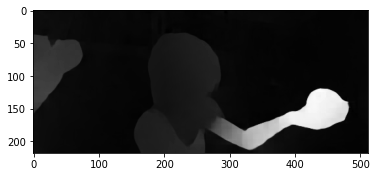

ic| ndimage.measurements.center_of_mass(gray_flo): (132.8284416210314, 289.80925061249724)
ic| 'exponentiated (** 4) grayscale flow'


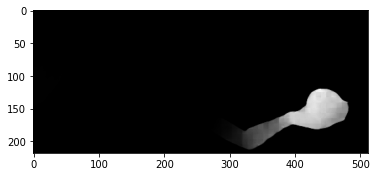

ic| ndimage.measurements.center_of_mass(gray_flo): (157.82469599495573, 418.7225281542077)


(157.82469599495573, 418.7225281542077)

In [12]:
import numpy as np
from scipy import ndimage
from skimage import color

# from RAFT/core/utils
from utils.frame_utils import readFlow as read_flow
from utils import flow_viz

def get_hw_coord_for_flo(flo_file, show_plot=False):
    flo_im = flow_viz.flow_to_image(read_flow(flo_file))
    if show_plot:
        ic("visualized flow file")
        plt.imshow(flo_im)
        plt.show()

    ic("grayscale flow")
    gray_flo = color.rgb2gray(flo_im)
    if show_plot:
        plt.imshow(gray_flo, cmap='gray')
        plt.show()

    # Invert the intensity so that "active" spots have higher numerical value in range [0, 1]
    gray_flo = (gray_flo - 1 ) * -1
    if show_plot:
        ic("grayscale flow (inverted high=1)")
        plt.imshow(gray_flo, cmap='gray')
        plt.show()
        ic(ndimage.measurements.center_of_mass(gray_flo))

    # Exponeniate the pixel values; they will still remain in [0, 1]
    gray_flo = gray_flo ** 4
    if show_plot:
        ic("exponentiated (** 4) grayscale flow")
        plt.imshow(gray_flo, cmap='gray')
        plt.show()
        ic(ndimage.measurements.center_of_mass(gray_flo))

    return ndimage.measurements.center_of_mass(gray_flo)


get_hw_coord_for_flo('/content/sample_frames_with_flos/frame0017.flo', show_plot=True)


======================================================================================================================

======================================================================================================================

# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [13]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 10.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=a8e8788ac141cea82dc67979be5d80332e33aae307dc59da87c1cccde64003e0
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [14]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.2MB 808kB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=c8a8b2d1308159540342574b7dd20b80c1e186b86e054e983dfc8b2b4849ff44
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


In [15]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

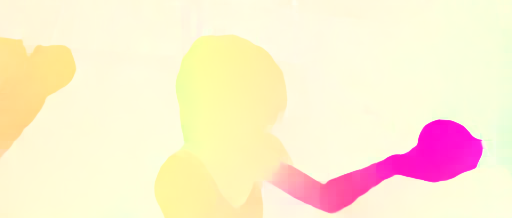

In [16]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
# im = cv2.imread("./input.jpg")

im = flo_0.copy()
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [17]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:27, 6.41MB/s]                           


In [28]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
ic(outputs["instances"].pred_classes.shape)
ic(outputs["instances"].pred_classes)
# https://detectron2.readthedocs.io/en/latest/modules/structures.html#detectron2.structures.Boxes
ic(outputs["instances"].pred_boxes.tensor.shape)
ic(outputs["instances"].pred_boxes)
ic(outputs["instances"].pred_masks.shape)
ic(outputs["instances"].pred_masks)
print('')

ic| outputs["instances"].pred_classes.shape: torch.Size([2])
ic| outputs["instances"].pred_classes: tensor([0, 0], device='cuda:0')
ic| outputs["instances"].pred_boxes.tensor.shape: torch.Size([2, 4])
ic| outputs["instances"].pred_boxes: Boxes(tensor([[138.2960,  31.5935, 417.8745, 215.7402],
                                             [143.9095, 126.7218, 491.2050, 217.1657]], device='cuda:0'))
ic| outputs["instances"].pred_masks.shape: torch.Size([2, 218, 512])
ic| outputs["instances"].pred_masks: tensor([[[False, False, False,  ..., False, False, False],
                                              [False, False, False,  ..., False, False, False],
                                              [False, False, False,  ..., False, False, False],
                                              ...,
                                              [False, False, False,  ..., False, False, False],
                                              [False, False, False,  ..., False, False, False],


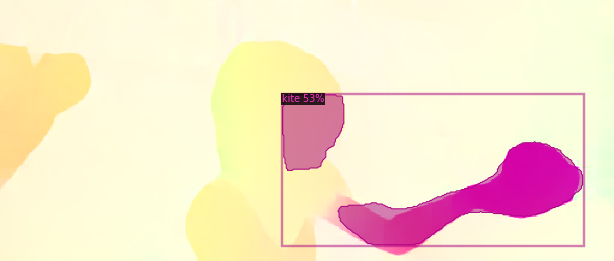

In [19]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

ic| len(flo_files): 9


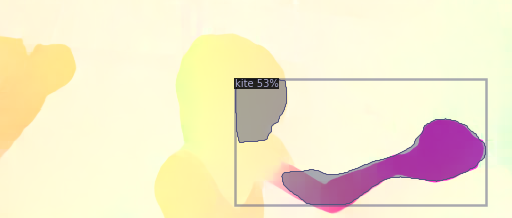

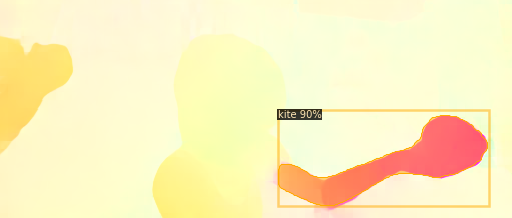

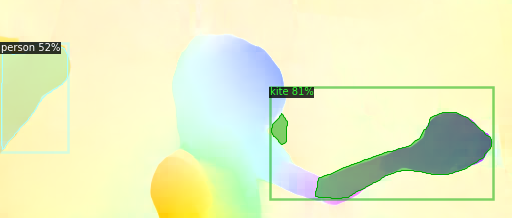

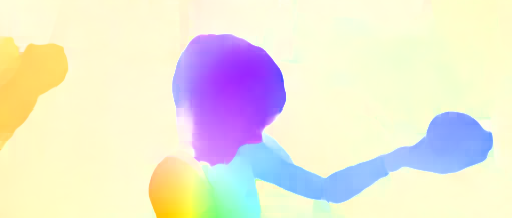

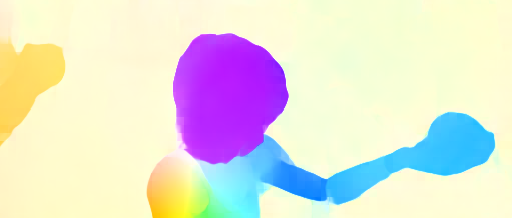

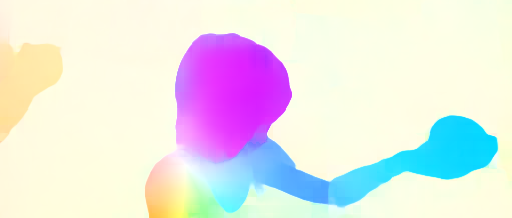

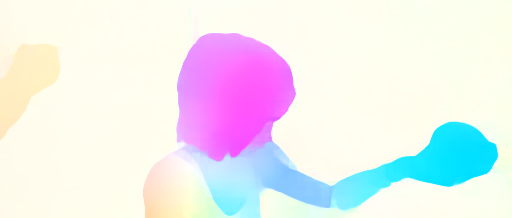

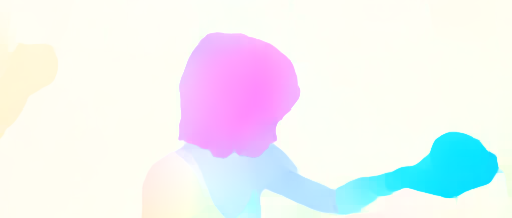

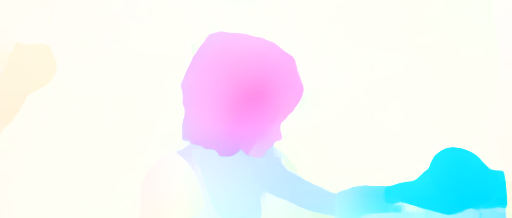

In [20]:
flo_files = glob.glob(os.path.join('sample_frames_with_flos/', '*.flo'))
flo_files = sorted(flo_files)
ic(len(flo_files))

flo_imgs = []
for flo_file in flo_files:
    flo = read_flow(flo_file)
    flo_img = flow_viz.flow_to_image(flo)
    flo_imgs.append(flo_img)

for flo_img in flo_imgs:
    outputs = predictor(flo_img)
    v = Visualizer(flo_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

ic| len(frame_files): 10


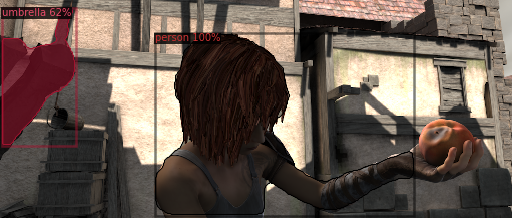

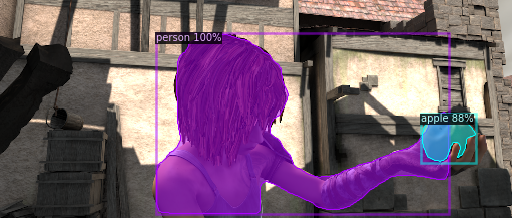

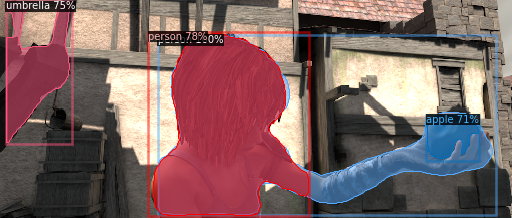

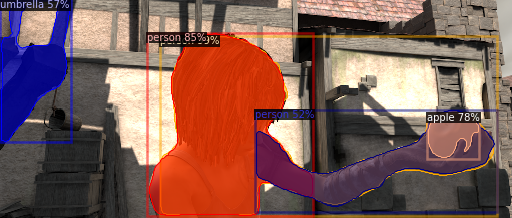

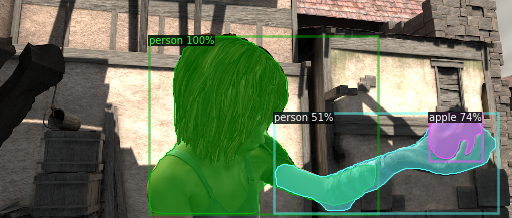

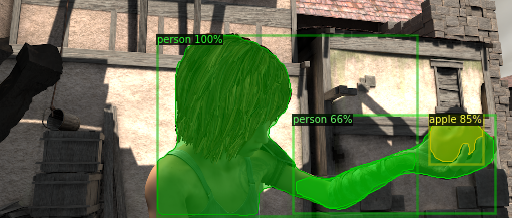

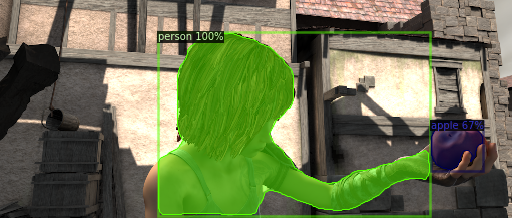

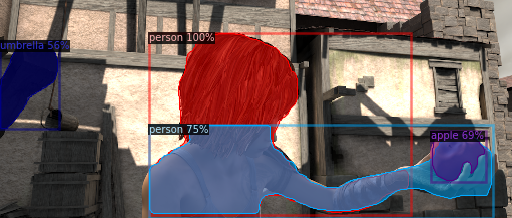

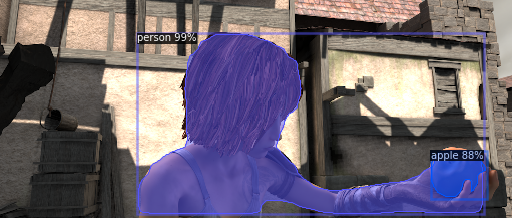

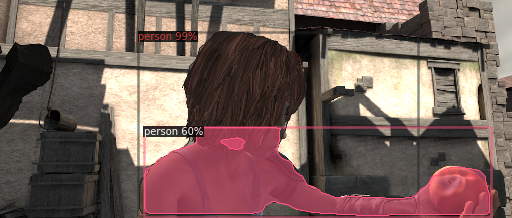

In [21]:
frame_files = glob.glob(os.path.join('sample_frames_with_flos/', '*.png'))
frame_files = sorted(frame_files)
ic(len(frame_files))

frame_images = [cv2.imread(f) for f in frame_files]

for frame in frame_images:
    outputs = predictor(frame)
    v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
